### Importing Relevant Packages

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [3]:
raw_csv_data = pd.read_csv("https://raw.githubusercontent.com/MaddoSaru/curso-series-temporales/master/3.%20Caracter%C3%ADsticas%20fundamentales/Python/Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')



### Removing Surplus Data

In [4]:
df_comp['market_value']=df_comp.spx

In [5]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [6]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))
#localización- parametro de localización- loc media, desviacion típica

In [7]:
df['wn'] = wn
#agregando columna al dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1092.877931
std,292.559287,291.984383
min,438.920000,11.395147
25%,914.620000,898.479435
50%,1144.650000,1094.147203
75%,1316.280729,1285.599018
max,1570.252238,2341.418765


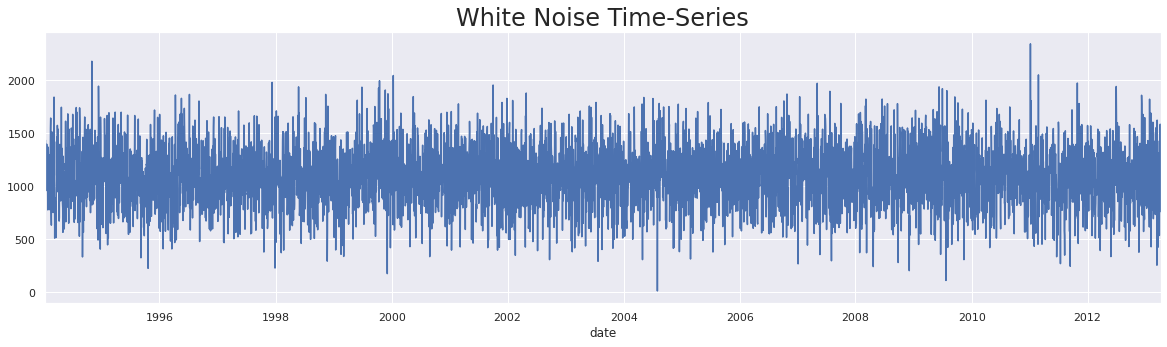

In [9]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()
#graficar el ruido blanco

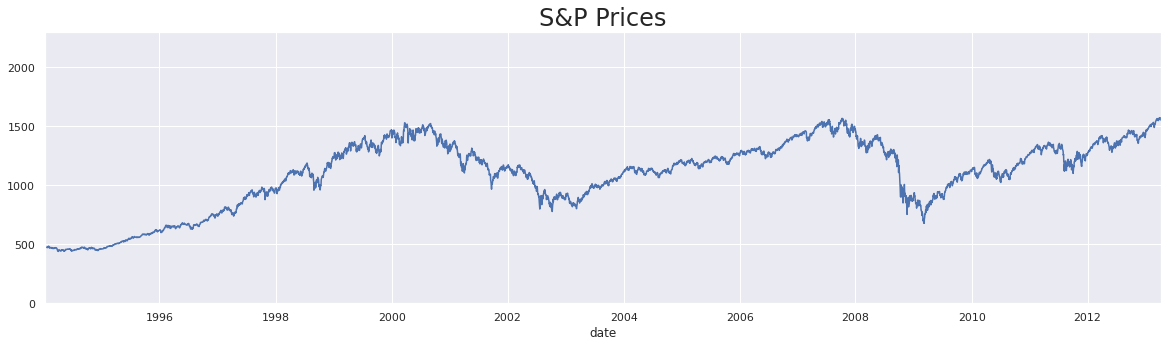

In [10]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

### Random Walk

In [11]:
rw = pd.read_csv("https://raw.githubusercontent.com/ecabestadistica/curso-series-temporales/master/3.%20Caracter%C3%ADsticas%20fundamentales/Python/RandWalk.csv")


In [12]:
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [13]:
rw.date = pd.to_datetime(rw.date, dayfirst = True)


In [14]:
rw.set_index("date", inplace = True)


In [15]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831
1994-01-10,1080.347860
1994-01-11,1082.095245


In [16]:
rw = rw.asfreq('b')
#business

In [17]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [18]:
df['rw'] = rw.price

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1199.983401,1122.139662
1994-01-10,475.27,1211.529803,1080.347860
1994-01-11,474.13,1058.614015,1082.095245
1994-01-12,474.17,1434.982525,1083.639265
1994-01-13,472.47,1262.624424,1067.146255


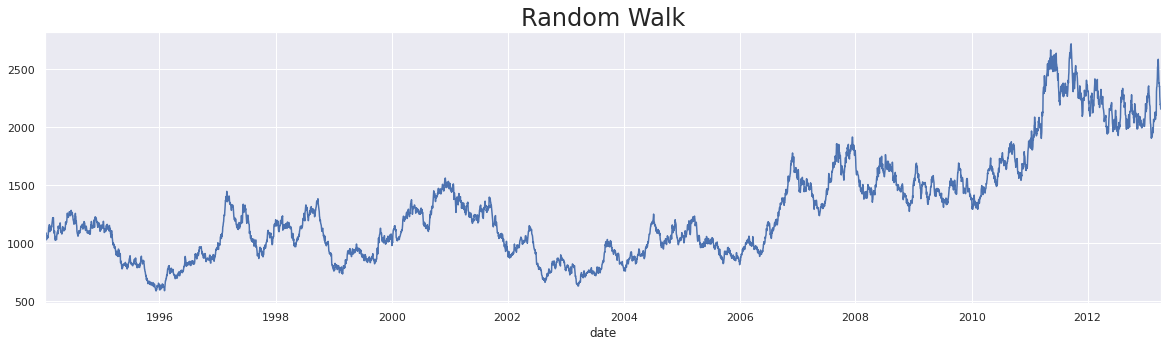

In [20]:
df.rw.plot(figsize = (20,5))
plt.title("Random Walk", size = 24)
plt.show()

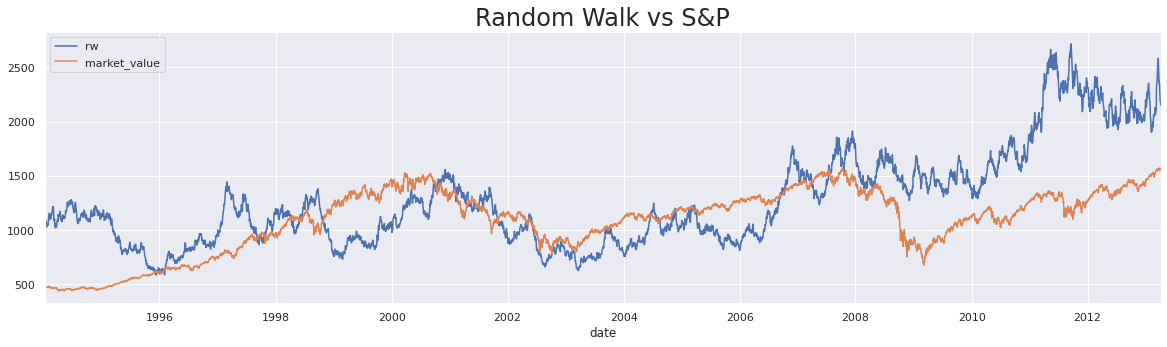

In [21]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.legend() 
plt.show()

### Stationarity

In [22]:
sts.adfuller(df.market_value)
#primer valor, valor del estadisco de contraste, comparar con el valor de significación
#segundo valor, p-valor, comparar p valor con nivel de significación, esta en el json {}
#tercer valor, numero de retrasos para calcular el estadistico, eso significa que la autocorrelación se renonta 18 periodos, usualmente en las series estacionarias no hay valores positivos
#valor crítico, despues de 5002- depende del valor de significación

#si tomamos el 1% la serie no es estacionaria
#para los tres valores la serie no es estacionaria
#nivel de significación 0.01, 0.1, 0.05 < p-valor = 0.4121

(-1.7369847452352454,
 0.4121645696770613,
 18,
 5002,
 {'1%': -3.431658008603046,
  '10%': -2.567077669247375,
  '5%': -2.862117998412982},
 39904.880607487445)

In [23]:
sts.adfuller(df.wn)
#sabemos que el ruido blanco es estacionario

(-51.17625055700659,
 0.0,
 1,
 5019,
 {'1%': -3.4316535759402753,
  '10%': -2.567076626752987,
  '5%': -2.8621160400844468},
 70796.76700099722)

In [24]:
sts.adfuller(df.rw)


(-1.3286073927689719,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '10%': -2.567078038881065,
  '5%': -2.8621186927706463},
 46299.333497595144)

### Seasonality

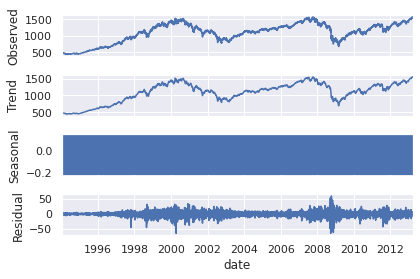

In [25]:
#Descomposición aditiva
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()
#seasonal, cambia constantemente y por lo pequeño del dibujo parece un rectangulo, no hay patron ciclico concreto
#los datos sufieren que no hay estacionalidad

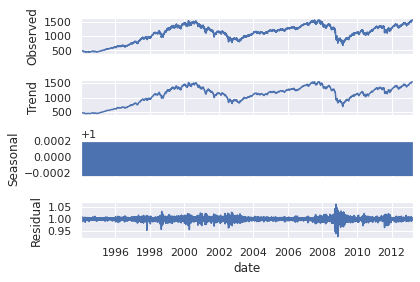

In [26]:
#Descomposición multiplicativa
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()
#no hay estacionalidad al igual que en caso de la aditiva

### ACF

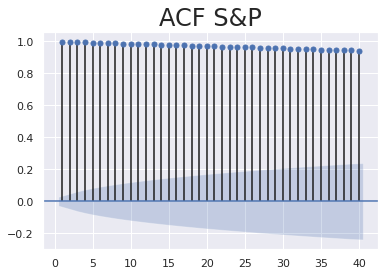

In [28]:
#regularmente los retrasos-lags empiezan en 40
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()
#el gráfico muestra los coeficentes de autocorrelación que pueden ir de -1 a 1 
#area azul muestra la significación de los valores de autocorrelación
#como las barras son más altas que la región azul, sugiere que los valores son significativos. Es un indicador de la dependencia en los datos.

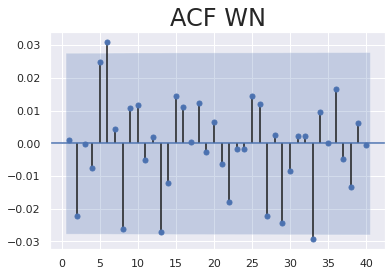

In [31]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF WN", size = 24)
plt.show()
#comparativa con el ruido blanco
#los valores cambian entre negativos y positivos y las barras, en su mayoria caen dentro de la región azul. Por lo tanto los coeficientes no son significativos en todo el gráfico.
#No hay autocorrelación

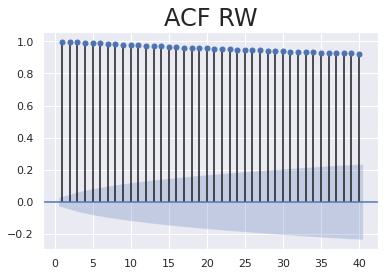

In [32]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF RW", size = 24)
plt.show()

### PACF

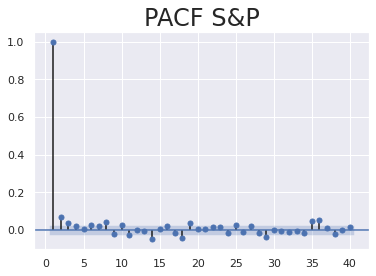

In [34]:
#autocorrelación parcial, metodo- minimos cuadrados ordinarios
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()
#area azul, area de significación. Los valores son esencialmente ceros

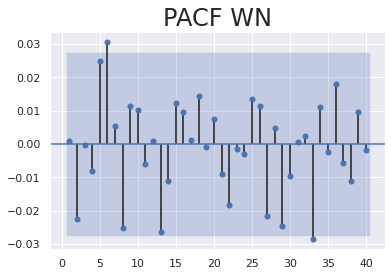

In [35]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()

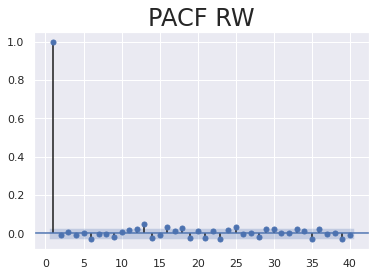

In [36]:
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = ('ols'))
plt.title("PACF RW", size = 24)
plt.show()